In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Loading the dataset
data_set = pd.read_csv('tested.csv')

In [3]:
#Displaying the shape of our dataset
data_set.shape

(418, 12)

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#Value count of the people survived and non survived
data_set['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

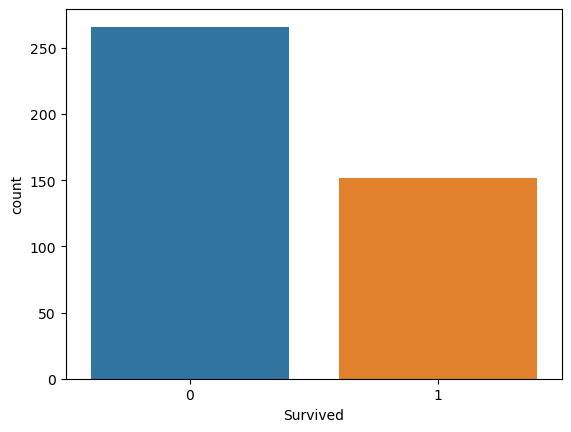

In [6]:
sns.countplot(x=data_set['Survived'])

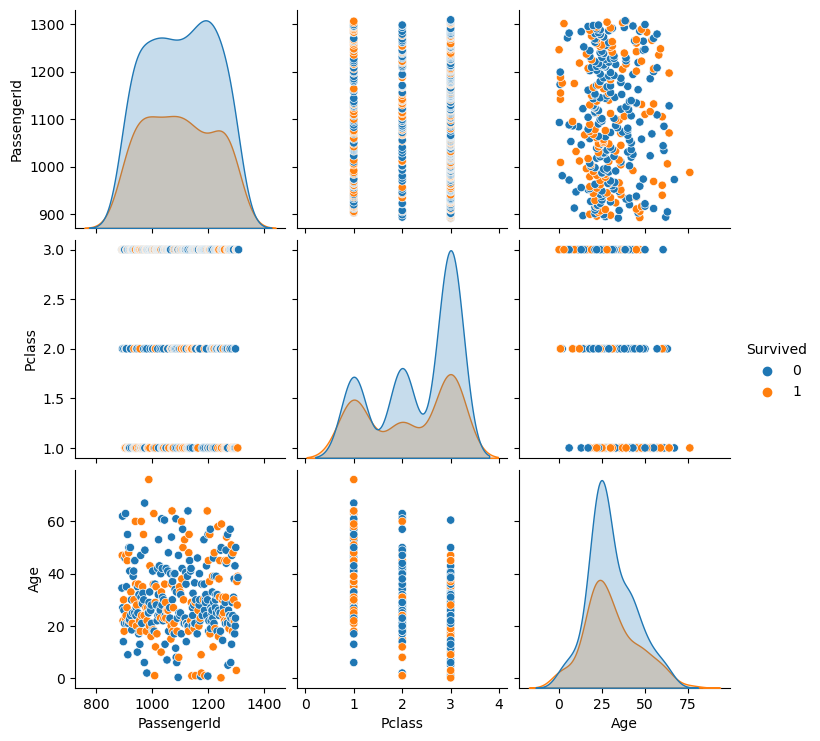

In [7]:
#creating pairplot
sns.pairplot(data_set.iloc[:,0:6], hue='Survived')

C:\Users\HP\AppData\Local\Temp\ipykernel_11252\2674296294.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.iloc[:,0:30].corr(), annot=True, fmt='.0%')


<Axes: >

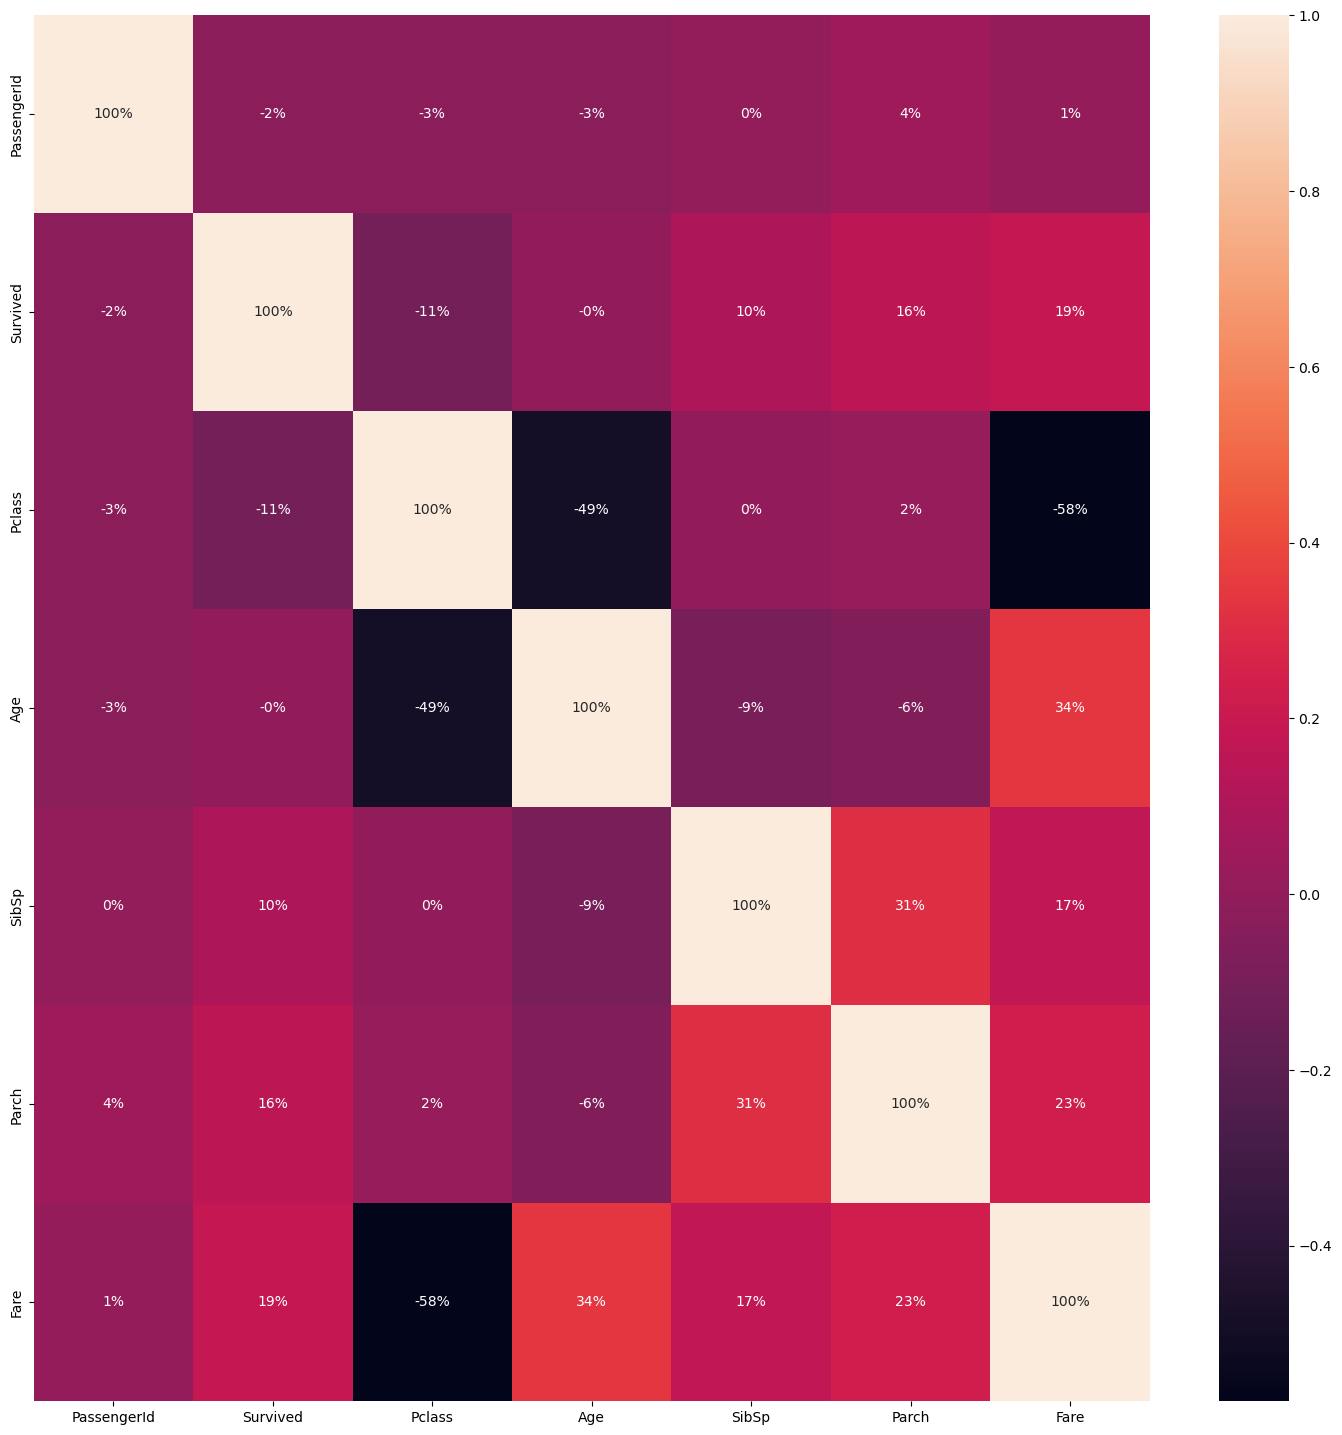

In [8]:
#visualizing the correlation
plt.figure(figsize=(18,18))
sns.heatmap(data_set.iloc[:,0:30].corr(), annot=True, fmt='.0%')

In [9]:
# Handle missing values
data_set.fillna(method='ffill', inplace=True)

In [10]:
# Converting categorical variables to numerical using one-hot encoding
data_set = pd.get_dummies(data_set, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [11]:
# Selecting relevant features for prediction excluding the non-numeric columns
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']
X = data_set[features]
Y = data_set['Survived']


In [12]:
# Spliting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Defining multiple classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}


In [14]:
# Training and evaluating each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, Y_train)


Training and evaluating Logistic Regression...
Training and evaluating Random Forest...
Training and evaluating Support Vector Machine...


In [15]:
# Making predictions on the test set
Y_pred = model.predict(X_test)


In [16]:
# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
for model_name, model in models.items():
   print(f'{model_name} Accuracy: {accuracy:.2f}')


# Displaying classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))
print('\n' + '='*50 + '\n')


Logistic Regression Accuracy: 0.99
Random Forest Accuracy: 0.99
Support Vector Machine Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



